In [0]:
!rm -rf ml_data/

In [1]:
file_id = "1lC8krUVr4Ah2kcjPxfqWStJDM48yk1pp" # replace with your ID
!gdown https://drive.google.com/uc?id={file_id}

Downloading...
From: https://drive.google.com/uc?id=1lC8krUVr4Ah2kcjPxfqWStJDM48yk1pp
To: /content/tar-archive-name.tar.gz
308MB [00:03, 102MB/s] 


In [2]:
!ls

sample_data  tar-archive-name.tar.gz


In [0]:
import tarfile

In [0]:
tar = tarfile.open('tar-archive-name.tar.gz', mode = 'r:gz')
for member in tar.getmembers():
  if '._' in member.name:
    continue
  else:
    tar.extract(member)
tar.close()

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
from keras.applications.vgg19 import (
    VGG19, preprocess_input, decode_predictions)

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import to_categorical, np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
import tensorflow as tf; tf.__version__

'1.15.0'

In [4]:
image_input = Input(shape=(224, 224, 3))
vgg = VGG19(input_tensor=image_input, include_top=False, weights='imagenet')
model = Sequential()
for layer in vgg.layers:
    model.add(layer)

# freeze the feature extractors
for layer in model.layers:
    layer.trainable = False

# add new classification layer
model.add(GlobalAveragePooling2D())
model.add(Dense(10, activation='softmax'))
model.summary()












Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 

In [5]:
train_datagen = ImageDataGenerator(
    
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    'ml_data/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    'ml_data/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 398 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


In [6]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit_generator(train_generator, 
                    epochs=25,
                    validation_data=test_generator)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/25
13/13 [==============================] - 24s 2s/step - loss: 5.7860 - acc: 0.1447 - val_loss: 4.3057 - val_acc: 0.3700
Epoch 2/25
13/13 [==============================] - 19s 1s/step - loss: 3.2707 - acc: 0.3746 - val_loss: 2.4694 - val_acc: 0.5000
Epoch 3/25
13/13 [==============================] - 19s 1s/step - loss: 2.0489 - acc: 0.5314 - val_loss: 1.5761 - val_acc: 0.6300
Epoch 4/25
13/13 [==============================] - 19s 1s/step - loss: 1.2834 - acc: 0.6186 - val_loss: 1.0459 - val_acc: 0.7500
Epoch 5/25
13/13 [==============================] - 19s 1s/step - loss: 0.9598 - acc: 0.7204 - val_loss: 0.8234 - val_acc: 0.8300
Epoch 6/25
13/13 [==============================] - 20s 2s/step - loss: 0.6544 - acc: 0.7840 - val_loss: 0.7107 - val_acc: 0.8600
Epoch 7/25
13/13 [==============================] - 19s 1s/step - loss: 0.5844 - acc: 0.8331 - val_loss: 0.5808 - val_acc:

In [0]:
#model.save("feature_model_monument.h5")
#!ls -ltr

In [0]:
#from keras.models import load_model

In [0]:
#load_model("feature_model_monument.h5")

In [10]:
model.save_weights("model_weights.h5")
!ls

feature_model_monument.h5  ml_data	     sample_data
img1.jpg		   model_weights.h5  tar-archive-name.tar.gz


In [11]:
# doing the same in the flask app as well
vgg = VGG19(input_tensor=image_input, include_top=False, weights=None)
model_ = Sequential()
for layer in vgg.layers:
    model_.add(layer)

# add new classification layer
model_.add(GlobalAveragePooling2D())
model_.add(Dense(10, activation='softmax'))
model_.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [0]:
model_.load_weights("model_weights.h5")

In [0]:
from keras.preprocessing import image

In [0]:
image_size = (224, 224)

In [15]:
!curl  https://brightcove04pmdo-a.akamaihd.net/5104226627001/5104226627001_5434711148001_5413965430001-vs.jpg >> img1.jpg
#https://www.lonelyplanet.com/news/wp-content/uploads/2019/01/shutterstockRF_1037036482.jpg >> img.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  430k  100  430k    0     0  2021k      0 --:--:-- --:--:-- --:--:-- 2021k


In [16]:
!ls

feature_model_monument.h5  ml_data	     sample_data
img1.jpg		   model_weights.h5  tar-archive-name.tar.gz


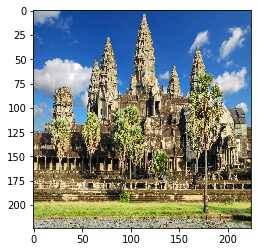

In [17]:
# Load the image and resize to default image size
image_path = os.path.join("img1.jpg")
img = image.load_img(image_path, target_size=image_size)
plt.imshow(img)

In [0]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [19]:
pred = model.predict(x)
pred

array([[9.9905676e-01, 1.7266488e-05, 8.9058193e-04, 1.6685252e-08,
        2.9038847e-07, 1.8537198e-06, 7.4595064e-08, 4.3622288e-07,
        3.2501317e-05, 2.8970328e-07]], dtype=float32)

In [20]:
pred_ = model_.predict(x)
pred_

array([[9.9905676e-01, 1.7266488e-05, 8.9058193e-04, 1.6685252e-08,
        2.9038847e-07, 1.8537198e-06, 7.4595064e-08, 4.3622288e-07,
        3.2501317e-05, 2.8970328e-07]], dtype=float32)

In [21]:
model_.predict_classes(x)

array([0])

In [23]:
class_map = {v: k for k, v in train_generator.class_indices.items()}
class_map[model_.predict_classes(x)[0]]

'angkor wat'